## Importing All Required Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [50]:
df = yf.download('GOOGL', start='2004-08-19', end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [51]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730975,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [52]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-18 00:00:00+00:00,175.300003,175.300003,175.440002,172.899994,173.419998,20206600
2024-11-19 00:00:00+00:00,178.119995,178.119995,178.869995,173.559998,173.720001,23434900
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2024-11-21 00:00:00+00:00,167.630005,167.630005,174.130005,163.699997,173.899994,59734400
2024-11-22 00:00:00+00:00,164.759995,164.759995,166.460007,163.899994,165.850006,38560400


In [53]:
df.duplicated().sum()

0

In [54]:
df.columns = df.columns.get_level_values(0)

## Copying the dataset for future use

In [55]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [56]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [57]:
df.drop(['Adj Close'], axis=1, inplace=True)

### Splitting into features and target

In [58]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [60]:
X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

### Model Building using Linear Regression

In [61]:
lr = LinearRegression()
start = time.time()
lr.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 0.003459930419921875


In [62]:
lr.score(X_train, y_train)

0.9998960398927105

In [63]:
predicted = lr.predict(X_test)
predicted

array([ 87.73775764,  88.24616766,  87.70197936, ..., 174.89669953,
       166.1808525 , 164.87162009])

In [64]:
prediction = pd.DataFrame({'Date': df1.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': predicted})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2020-11-04 00:00:00+00:00,87.292503,87.737758
2020-11-05 00:00:00+00:00,88.125000,88.246168
2020-11-06 00:00:00+00:00,87.986504,87.701979
2020-11-09 00:00:00+00:00,88.070999,89.153173
2020-11-10 00:00:00+00:00,86.886002,87.150277
...,...,...
2024-11-18 00:00:00+00:00,175.300003,174.666843
2024-11-19 00:00:00+00:00,178.119995,177.700760
2024-11-20 00:00:00+00:00,175.979996,174.896700


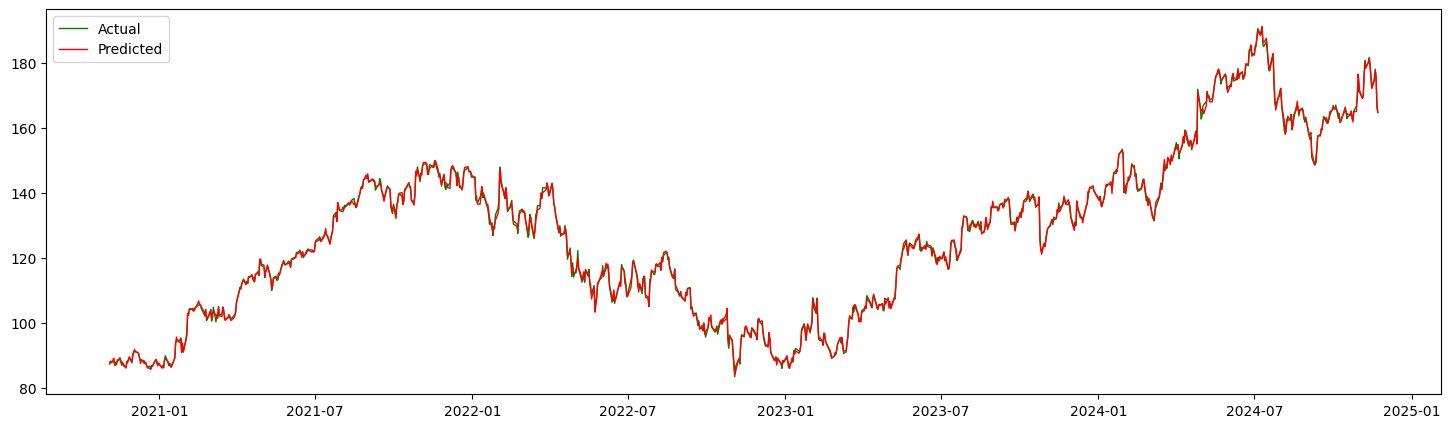

In [65]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


In [66]:
lr.predict(scaler.transform([[165.86, 167.65, 165.24, 3621520]]))

array([167.67595076])

In [67]:
df1[df1.Date == '2004-09-01']

Price,Date,Adj Close,Close,High,Low,Open,Volume
9,2004-09-01 00:00:00+00:00,2.502562,2.508759,2.576827,2.494244,2.57007,182765052


In [68]:
lr.predict(scaler.transform([[2.57007, 2.576827, 2.494244, 182765052]]))

array([2.61920447])

## Calculating the Performance Evaluation Metrics

In [69]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.6533122553573204
Root Mean Squared Error: 0.8082773381441053
Mean Absolute Error: 0.6267883819885567
